### Load essential libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import spacy

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,date,year,review_likes,review,rating
0,September 18,2019,111,i have a paid account and recently upgraded to...,1.0
1,October 6,2019,14,every month i have been paying regularly for m...,3.0
2,October 4,2019,35,this app has simply made a happy google custom...,5.0
3,September 27,2019,36,it s alright but at this point i feel like the...,3.0
4,October 9,2019,0,google is good but the game harvest solitair...,4.0


In [4]:
data.rating.value_counts()

5.0    48048
1.0    39366
4.0    12276
3.0     8074
2.0     6381
Name: rating, dtype: int64

In [5]:
data.shape

(114205, 5)

### Drop null values
Null count is around 1000

In [6]:
# convert all text data to lowercase
data.review = data.review.str.lower()

In [7]:
data = data.dropna()

In [8]:
data.isna().any()

date            False
year            False
review_likes    False
review          False
rating          False
dtype: bool

In [9]:
data.review_likes = pd.to_numeric(data.review_likes)

/home/sukhad/env/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


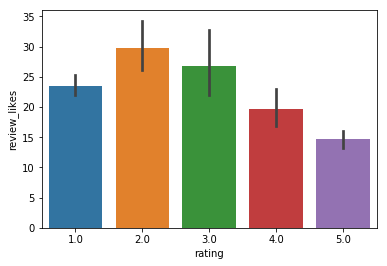

In [10]:
# relation between ratings and review_likes
sns.barplot(x=data.rating,y=data.review_likes)

In [11]:
nlp = spacy.load('en') 

In [36]:
# experimental
def preprocess(x):
    """
        Splits the sentence x into tokens, ignores stop words and lemmatize the tokens
    """
    tokens = []
    doc = nlp(x)
    for token in doc:
        if not token.is_space and not token.lemma_=="-PRON-" and not token.is_punct:
            tokens.append(token.lemma_)
        if token.lemma_ == "-PRON-":
            tokens.append(str(token))
    return tokens

print(preprocess(data.review[0]))
print(data.review[0])

['i', 'have', 'a', 'pay', 'account', 'and', 'recently', 'upgrade', 'to', 'tb', 'and', 'i', 'still', 'can', 'not', 'control', 'or', 'see', 'what', 'i', 'can', 'or', 'can', 'not', 'backup', 'even', 'when', 'select', 'see', 'detail', 'the', 'detail', 'be', 'basically', 'turn', 'on', 'or', 'off', 'thing', 'data', 'multimedia', 'message', 'or', 'photo', 'video', 'so', 'if', 'you', 'want', 'to', 'see', 'if', 'a', 'certain', 'folder', 'be', 'be']
i have a paid account and recently upgraded to  tb and i still cannot control or see what i can or cannot backup  even when selecting  see details   the  details  are basically turning on or off   things  data  multimedia messages or photos videos  so  if you want to see if a certain folder is being


In [39]:
# does take some time around 20 f**king min
#data['tokens'] = data.review.apply(preprocess)

In [2]:
#data.to_csv("cleaned_data.csv",index=False)
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.rating

0         1.0
1         3.0
2         5.0
3         3.0
4         4.0
5         1.0
6         2.0
7         1.0
8         2.0
9         1.0
10        2.0
11        1.0
12        3.0
13        2.0
14        1.0
15        5.0
16        1.0
17        1.0
18        3.0
19        4.0
20        1.0
21        1.0
22        5.0
23        1.0
24        5.0
25        5.0
26        1.0
27        1.0
28        5.0
29        5.0
         ... 
113849    5.0
113850    1.0
113851    1.0
113852    5.0
113853    4.0
113854    1.0
113855    5.0
113856    4.0
113857    4.0
113858    2.0
113859    5.0
113860    5.0
113861    5.0
113862    5.0
113863    2.0
113864    5.0
113865    4.0
113866    5.0
113867    5.0
113868    5.0
113869    2.0
113870    2.0
113871    5.0
113872    4.0
113873    5.0
113874    5.0
113875    5.0
113876    4.0
113877    4.0
113878    4.0
Name: rating, Length: 113879, dtype: float64

In [4]:
data.rating = data.rating.map({1.0:1,2.0:1,3.0:2,4.0:3,5.0:3})

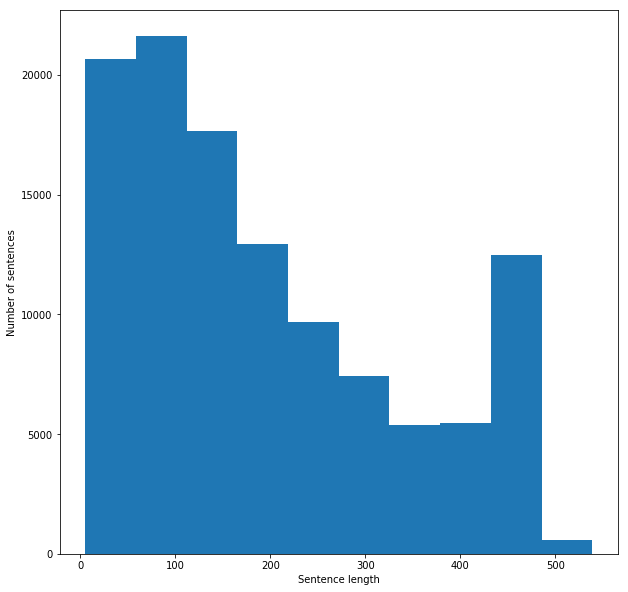

In [5]:
sentence_len = [len(tokens) for tokens in data.tokens]

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_len)
plt.show()

## Bag of words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

X = data.review
y = data.rating

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y,test_size=0.1,random_state=42)

In [7]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(102491,)
(102491,)
(11388,)
(11388,)


In [8]:
x_train_count, count_vectorizer = cv(train_x)
x_test_count = count_vectorizer.transform(test_x)

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_count,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pred = lr.predict(x_test_count)

In [11]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(pred,test_y))

0.26396206533192834


In [12]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, lr, 10)

In [13]:
importance

{0: {'bottom': [(-2.1706116914930846, 'fantastic'),
   (-2.1731792354805513, 'best'),
   (-2.195695243346146, 'osm'),
   (-2.215054234111131, 'nic'),
   (-2.328148204110099, 'amazing'),
   (-2.354616036955454, 'mast'),
   (-2.418488983706014, 'loving'),
   (-2.4270122060246178, 'awesome'),
   (-2.642450045489917, 'superb'),
   (-2.776164287262972, 'excellent')],
  'tops': [(2.36003887671898, 'useless'),
   (2.4201769494371113, 'trash'),
   (2.4369392990346963, 'waste'),
   (2.48872613430624, 'west'),
   (2.53742058179195, 'garbage'),
   (2.5874774973547945, 'wast'),
   (2.6198646490091577, 'faltu'),
   (2.689675831787258, 'bakwas'),
   (3.115593936105248, 'worst'),
   (3.2514873678800336, 'wrost')]},
 1: {'bottom': [(-1.3825504610536619, 'tons'),
   (-1.40036612452097, 'exactly'),
   (-1.4292877093337386, 'exists'),
   (-1.4372534052156436, 'notifs'),
   (-1.4402484575999992, 'remind'),
   (-1.4914121743388595, 'wrost'),
   (-1.5059647925840742, 'usual'),
   (-1.5209177569394268, 'wors

In [14]:
# TODO
# Naive bayes
# RNN (?)

# Try out with Tf-idf word-embeddings,

In [15]:
a = count_vectorizer.transform(["Controls are sloppy and I die often when holding down one direction. The upgrades are also very expensive, almost as if the developers want you to buy the coins. If unexpierenced, this game will make you rage. Other than that, the game is overall good. Unique designs, interesting mechanics, and mult","This game has potential but sadly I just cant Play the game, Theres no tutorial or anything, The tips are not helpful, ADS ARE WORST, This game is good but you lack so many Things to this game to be considered a good game.","I get it. You guys need to make money though ads. But cmon, one every other run? That's just too much, even with the possibility of canceling them with 5 seconds, it just adds up to too many in too little time becausr the runs are fairly quick. I'm giving it two stars solely for this reason. I loved"])

In [16]:
pred = lr.predict(a)

In [17]:
pred

array([3, 1, 2])

## TF-idf

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(data):
    tf_vectorizer = TfidfVectorizer()

    emb = tf_vectorizer.fit_transform(data)

    return emb, tf_vectorizer

X = data.review
y = data.rating

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y,test_size=0.1,random_state=42)

In [19]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(102491,)
(102491,)
(11388,)
(11388,)


In [20]:
x_train_count, tf_vectorizer = tfidf(train_x)
x_test_count = tf_vectorizer.transform(test_x)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_count,train_y)

pred = lr.predict(x_test_count)

In [22]:
print(mean_absolute_error(pred,test_y))

0.2507903055848261


In [23]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, lr, 10)

In [24]:
importance

{0: {'bottom': [(-4.625561197483902, 'wonderful'),
   (-5.243165364025989, 'nice'),
   (-5.954797247499891, 'good'),
   (-7.000867435935583, 'excellent'),
   (-7.558534268490747, 'awesome'),
   (-8.089594366232944, 'amazing'),
   (-8.202260874077357, 'easy'),
   (-8.584317676866817, 'best'),
   (-9.688530827872345, 'great'),
   (-10.729594541258638, 'love')],
  'tops': [(4.699117889318672, 'pay'),
   (4.76605834245939, 'fake'),
   (5.21795321733553, 'scam'),
   (5.239224794047829, 'stupid'),
   (5.656636043271442, 'horrible'),
   (5.660579941098805, 'terrible'),
   (5.706135933293488, 'not'),
   (6.899475904640098, 'useless'),
   (6.986247433697868, 'waste'),
   (9.16006517228161, 'worst')]},
 1: {'bottom': [(-2.578016038754663, 'perfect'),
   (-2.5791784411468366, 'worth'),
   (-2.7876616739304585, 'ever'),
   (-2.90084216748556, 'recommend'),
   (-3.184270464406428, 'love'),
   (-3.255204950547661, 'install'),
   (-3.269638713958965, 'amazing'),
   (-3.5302715054950062, 'best'),
   (

### Pipeline
- CountVectorizer
- TfIdfTransformer
- Naive bayes classifier

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

In [26]:
from sklearn.model_selection import GridSearchCV

X = data.review
y = data.rating

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y,test_size=0.1,random_state=42)

In [27]:
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring='accuracy')
clf.fit(train_x, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__alpha': [1, 0.1, 0.01], 'tfidf__use_idf': (True, False), 'tfidf__norm': ('l1', 'l2'), 'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(test_y, clf.predict(test_x), digits=4))

             precision    recall  f1-score   support

          1     0.8165    0.8869    0.8502      4561
          2     0.5000    0.0012    0.0025       807
          3     0.8567    0.9153    0.8850      6020

avg / total     0.8153    0.8391    0.8085     11388



In [30]:
print(mean_absolute_error(clf.predict(test_x),test_y))

0.25087811731647347


In [31]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...alse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

### Save the model

In [32]:
tobePersisted = dict({
    'model': clf.best_estimator_,
    'metadata': {
        'name': 'App sentiment analysis',
        'metrics': {
            'f1-score': 0.8085
        }
    }
})

In [33]:
tobePersisted

{'metadata': {'metrics': {'f1-score': 0.8085},
  'name': 'App sentiment analysis'},
 'model': Pipeline(memory=None,
      steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 2), preprocessor=None, stop_words=None,
         strip...alse,
          use_idf=False)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])}

In [35]:
from joblib import dump
dump(tobePersisted,'model.joblib')

['model.joblib']

In [36]:
data.review[5]

'the backup device doesn t seem to work  when i go into settings to start a backup  it says its offline try again later  even though my internet is obviously just fine since i just dl d the app  reached out to support and they were very unhelpful  seemed unaware of amy function of this app  according'

In [37]:
data.rating[5]

1